# Singlar value decomposition

Execute each cell below and follow the instructions.

In [1]:
import numpy as np
import numpy.linalg as la
from numpy import cos,sin,pi
import matplotlib.pyplot as plt
from numpy.linalg import norm
import imageio


# Rectangular matrix
---
Below we demonstrate that for a rectangular matrix A the maximum value for ||$A\vec{\mathbf{x}}$||  is the square root of largest eigenvalue for $ A^{T}A$ and this value is attained at the unit eigenvector for $A^{T}A$ that corresponds to this maximum eigenvalue.

---

In [2]:
A = np.array([1,2,1,0,1,1]).reshape(2,3) # define a rectangular matrix
A

array([[1, 2, 1],
       [0, 1, 1]])

---
Create a sphere of points. 

---

In [3]:
points = np.array([[sin(t)*cos(s),sin(t)*sin(s),cos(t)] for t in np.linspace(0,pi,100)for s in np.linspace(0,2*pi,100)])

---
Multipy each of these points by A and see which resulting vector has the largest norm.

---

In [4]:
index=np.argmax(norm((A@points.T),axis=0))
(norm(A@points[index]).round(2),points[index].round(2))

# Below we see the largest stretch(2.76) and which vector attains it.

(2.76, array([0.31, 0.81, 0.5 ]))

In [5]:
val,vec = la.eig(A.T@A)
val,vec
print(f"\nThe eigenvalues for A.T@A are {val}\n")
print(f"The eigenvectors for A.T@A are {vec[:,0].round(2)} and {vec[:,1].round(2)}\n and {vec[:,2].round(2)}")


The eigenvalues for A.T@A are [ 7.60555128e+00  3.94448725e-01 -2.18245330e-16]

The eigenvectors for A.T@A are [-0.32 -0.81 -0.49] and [-0.75 -0.1   0.65]
 and [ 0.58 -0.58  0.58]


---

Compute square root of the largest eigenvalue for $A^{T}A$.

---

In [6]:
(val[0]**.5).round(2) # compare this to the above value 

2.76

# Singular values for a matrix
---
Singular values for A are the square roots of eigenvalues for $A^{T}A$.

---

In [7]:
la.svd(A)[1] # show singular values for A , compare to above...

array([2.7578164 , 0.62805153])

---

If A is symmetric the singluar values are the absolute values of the eigenvalues for A.

---

In [8]:
A = np.array([[1,2],[2,3]])
A

array([[1, 2],
       [2, 3]])

In [9]:
la.eig(A)[0]

array([-0.23606798,  4.23606798])

In [10]:
la.svd(A)[1] # show singular values for A , compare to above...

array([4.23606798, 0.23606798])

# Example from text.  Construct a Singular Value Decomposition of the matrix A,  p. 443 in text.

$$ A=\begin{bmatrix}4 & 11 & 14 \\8 & 7 & -2 \end{bmatrix}\ $$

$$A = U \Sigma V^{T}$$


In [11]:
A = np.array([4,11,14,8,7,-2]).reshape(2,3)
A

array([[ 4, 11, 14],
       [ 8,  7, -2]])

---
Step 1. Find the orthogonal diagonalization of $A^{T}A$

---

In [12]:
val,vec = la.eig(A.T@A)
val,vec

(array([ 3.60000000e+02, -3.18981901e-14,  9.00000000e+01]),
 array([[-0.33333333, -0.66666667, -0.66666667],
        [-0.66666667,  0.66666667, -0.33333333],
        [-0.66666667, -0.33333333,  0.66666667]]))

---
Sort eigenvalues in descending order

---

In [13]:
idx = np.argsort(val)[::-1] 


In [14]:
vec = vec[idx].T
val = val[idx]
val,vec

(array([ 3.60000000e+02,  9.00000000e+01, -3.18981901e-14]),
 array([[-0.33333333, -0.66666667, -0.66666667],
        [-0.66666667, -0.33333333,  0.66666667],
        [-0.66666667,  0.66666667, -0.33333333]]))

---
Matrix V is the unit eigenvectors of $A^{T}A$

___

In [15]:
V = vec
V

array([[-0.33333333, -0.66666667, -0.66666667],
       [-0.66666667, -0.33333333,  0.66666667],
       [-0.66666667,  0.66666667, -0.33333333]])

---
The singular values are the square root of eigenvalues of $A^{T}A$.

---

In [16]:
singular_values = val[:2]**.5 # the third eigenvalue is zero.
singular_values

array([18.97366596,  9.48683298])

---
Form the matrix $\Sigma$ we call it S.

---

In [17]:
D = np.diag(singular_values)
D

array([[18.97366596,  0.        ],
       [ 0.        ,  9.48683298]])

In [18]:
S = np.c_[D,[0,0]]
S

array([[18.97366596,  0.        ,  0.        ],
       [ 0.        ,  9.48683298,  0.        ]])


---
Form the matrix U.  Column i of U is given by:    $\vec{\mathbf{u_i}}=A\vec{\mathbf{v_i}}/\sigma_i$

---

In [19]:
u1 = A@V[:,0]/singular_values[0]
u2 = A@V[:,1]/singular_values[1]

In [20]:
U = np.c_[u1,u2]
U

array([[-0.9486833 ,  0.31622777],
       [-0.31622777, -0.9486833 ]])

In [21]:
(U,S,V.T)

(array([[-0.9486833 ,  0.31622777],
        [-0.31622777, -0.9486833 ]]),
 array([[18.97366596,  0.        ,  0.        ],
        [ 0.        ,  9.48683298,  0.        ]]),
 array([[-0.33333333, -0.66666667, -0.66666667],
        [-0.66666667, -0.33333333,  0.66666667],
        [-0.66666667,  0.66666667, -0.33333333]]))

---

Check the product. $U \Sigma V^T$

---

In [22]:
U@S@V.T  # the result below is correct

array([[ 4., 11., 14.],
       [ 8.,  7., -2.]])

___
An easier way. Use np.linalg.svd.

___

In [23]:
la.svd(A)  # easier way to do it

(array([[-0.9486833 , -0.31622777],
        [-0.31622777,  0.9486833 ]]),
 array([18.97366596,  9.48683298]),
 array([[-0.33333333, -0.66666667, -0.66666667],
        [ 0.66666667,  0.33333333, -0.66666667],
        [-0.66666667,  0.66666667, -0.33333333]]))

In [24]:
A

array([[ 4, 11, 14],
       [ 8,  7, -2]])

---
---

# Application 1.     Image compression

Rank n approximation of an Image is given by:

$$A = \sum_{i=0}^{n-1}\sigma_i\vec{\mathbf{u_i}}\vec{\mathbf{v_i}}^{T} $$

---

---

Import image and display it.

---

In [25]:
img = imageio.imread("https://github.com/rmartin977/Math-266/blob/main/rieman.jpeg?raw=true")

In [26]:
img.shape

(246, 225)

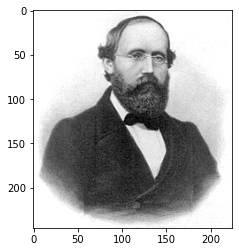

In [27]:
plt.imshow(img,cmap='gray')

---
Perfrom SVD of image.

---

In [28]:
U,S,V = la.svd(img)

---
Notice magnitude of singular values fall off rapidly.

---

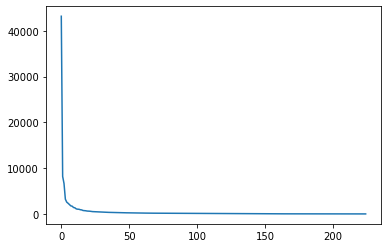

In [29]:
plt.plot(S)


---

Rank 1 approximation:

---

In [30]:
rank_1 = S[0]*np.outer(U[:,0],V[0,:])
rank_1.shape

(246, 225)

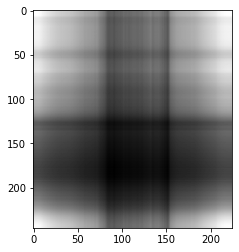

In [31]:
plt.imshow(rank_1,cmap='gray')

In [32]:
def img(k):
    '''
    The function will return a rank_i approximation for the image of Rieman.
    '''
    return np.sum([ S[i]*np.outer(U[:,i],V[i,:]) for i in range(k)],axis=0)

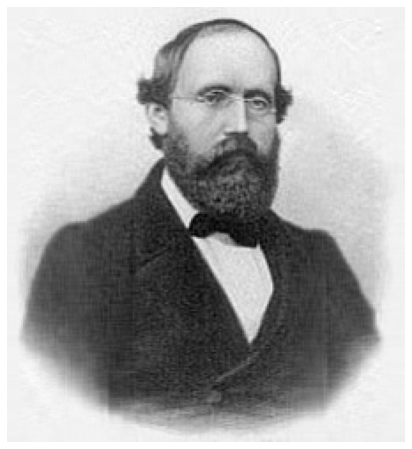

In [33]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(img(50),cmap='gray')

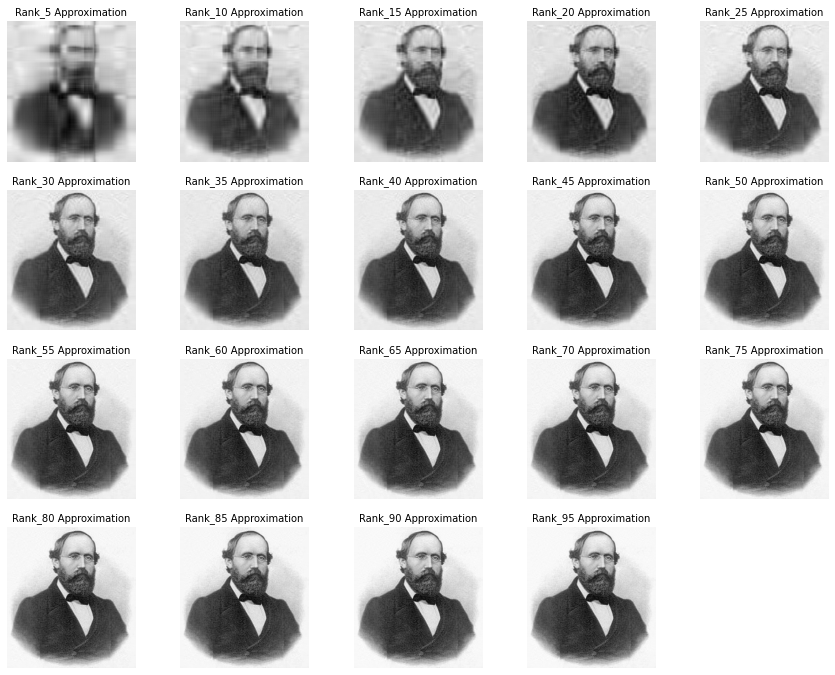

In [34]:
plt.figure(figsize=(15,15))
for k in range(5,100,5):
    plt.subplot(5,5, int(k/5))
    plt.axis('off')
    plt.imshow(img(k),cmap='gray')
    plt.title(f'Rank_{k} Approximation', fontsize=10)

---

Create a rank 5 and save image to file.

---

In [35]:
rank_5=np.sum([ S[i]*np.outer(U[:,i],V[i,:]) for i in range(5)],axis=0)

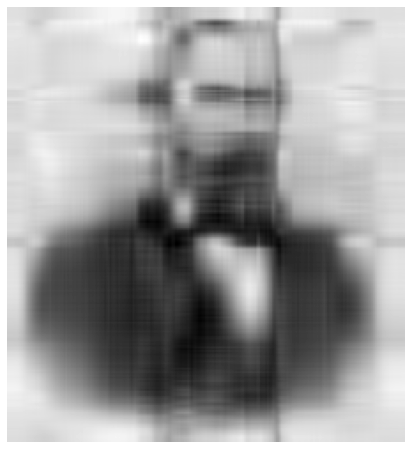

In [48]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(rank_5,cmap='gray')
plt.savefig("rank_5.jpg")

# to save on your G-drive you need to:
# 1. Mount your drive.
# 2. Change the path to the file as "drive/MyDrive/rank_5.jpg"

---
---

# Your turn. 

Import the image of MonaLisa and creat a rank_5 approximation for this image.  Save a copy of the image to your G-drive.  Upload the image to Gradescope.

---
---

In [37]:
image = imageio.imread("https://github.com/rmartin977/Math-266/blob/main/ml.jpg?raw=true")

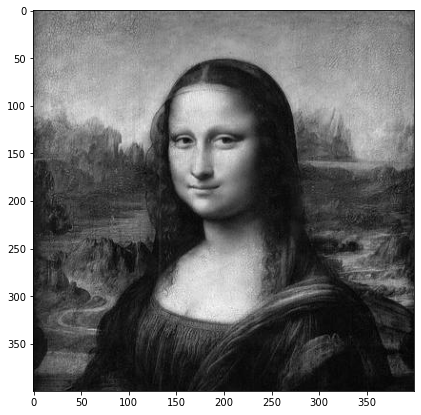

In [38]:
plt.figure(figsize=(7,7))
plt.imshow(image,cmap='gray')

In [39]:
#Your code

---
---
# Application #2. Pseudo inverse.

We will solve the system: $$ \begin{bmatrix}4 & 11 & 14 \\8 & 7 & -2 \end{bmatrix}\ \begin{bmatrix}x_1  \\ x_2  \end{bmatrix}= \begin{bmatrix}1  \\ 1  \end{bmatrix} $$ 

By computing the pseudo invers of matrix A.  The pseudo inverse is given by:

$$A^{t} = V\Sigma ^{-1} U^{T}$$



---
---

---
First we recompute the svd for A.

___


In [40]:
A = np.array([4,11,14,8,7,-2]).reshape(2,3)
val,vec = la.eig(A.T@A)
idx = np.argsort(val)[::-1] 
vec = vec[idx].T
val = val[idx]
V = vec
singular_values = val[:2]**.5 # the third eigenvalue is zero.
D = np.diag(singular_values)
S = np.c_[D,[0,0]]
u1 = A@V[:,0]/singular_values[0]
u2 = A@V[:,1]/singular_values[1]
U = np.c_[u1,u2]

---

Now we compute the pseudo inverse and call it A_inv.

---

In [41]:
A_inv=V[:,:2]@la.inv(D)@U.T  # pseudo inverse of A , note we just use first 2 columns of U, also we use D instead of S
A_inv

array([[-0.00555556,  0.07222222],
       [ 0.02222222,  0.04444444],
       [ 0.05555556, -0.05555556]])

---

Use A_inv to solve system

___

In [42]:
x = A_inv @ np.array([[1],[1]])
x

array([[ 6.66666667e-02],
       [ 6.66666667e-02],
       [-2.77555756e-17]])

---
Check the solution.

---

In [43]:
A @ x

array([[1.],
       [1.]])

---
Compare to solution given by least square.

---

In [44]:
la.lstsq(A,np.array([[1],[1]]),rcond=None)[0]

array([[6.66666667e-02],
       [6.66666667e-02],
       [9.97292169e-18]])

---

Compare to pseudoinverse to pseudoinverse given by numpy.

---

In [45]:
la.pinv(A)

array([[-0.00555556,  0.07222222],
       [ 0.02222222,  0.04444444],
       [ 0.05555556, -0.05555556]])

## Your turn...
Answer the following 4 questions.  Go to gradescope Lecture #10 and enter your answers.

1. Upload rank 5 image of MonaLisa.
2. What is the largest singular value for the matrix $A= \begin{bmatrix}1 & 2 & 1 \\ 1 & 1 & -1 \end{bmatrix}$?
3. Solve the system using pseudo inverse.  $$ \begin{bmatrix}1 & 2 & 1 \\1 & 1 & -1 \end{bmatrix}\ \begin{bmatrix}x_1  \\ x_2\\x_3  \end{bmatrix}= \begin{bmatrix}1  \\ 1  \end{bmatrix} $$ 
4. Find the maximum of||$A\vec{\mathbf{x}}$|| where ||$\vec{\mathbf{x}}$||=1 and $A= \begin{bmatrix}1 & 2  \\ 3 & 1  \end{bmatrix}$.
